 # Predicting Heart Disease

In [25]:
from pathlib import Path
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = Path('Resources/prepped_cardio_data.csv')
df = pd.read_csv(data)
df.head()

,index,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Diabetes_num,Arthritis_Binary,Alcohol_outlier_treated,Fruit_outlier_treated,Green_Vegetables_outlier_treated,FriedPotato_outlier_treated
0,0,0,3,0,0,0,0,0,0,0,150.0,32.66,14.54,1,0,1,0.0,30.0,16.0,12.0
1,1,3,4,0,1,0,0,0,0,0,165.0,77.11,28.29,0,1,0,0.0,30.0,0.0,4.0
2,2,3,4,1,0,0,0,0,0,1,163.0,88.45,33.47,0,1,0,4.0,12.0,3.0,16.0
3,3,0,4,1,1,0,0,0,1,2,180.0,93.44,28.73,0,1,0,0.0,30.0,30.0,8.0
4,4,2,4,0,0,0,0,0,1,3,191.0,88.45,24.37,1,0,0,0.0,8.0,4.0,0.0


In [3]:
# Separate the test_df Features (X) from the Target (y)

y = df["Heart_Disease"]
X = df.drop(columns="Heart_Disease")

In [4]:
undersampler = RandomUnderSampler(sampling_strategy = "auto")
X_resample, y_resample = undersampler.fit_resample(X, y)

# Split our data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, 
                                                    y_resample, 
                                                    random_state=1, 
                                                    stratify=y_resample)
X_resample.shape, y_resample.shape

((49942, 19), (49942,))

In [5]:
X_resample.shape, y_resample.shape

((49942, 19), (49942,))

In [6]:
# Create a Logistic Regression Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=500,
                                random_state=1)
classifier

LogisticRegression(max_iter=500, random_state=1)

In [7]:
selector = SelectKBest(k=6)

In [8]:
X_reduced = selector.fit_transform(X_train,y_train)
X_reduced.shape
s = selector.get_support()
s

array([False,  True,  True, False, False, False, False, False,  True,
       False, False, False,  True,  True,  True, False, False, False,
       False])

In [9]:
columns = X_train.columns[s]
columns


Index(['General_Health', 'Checkup', 'Age_Category', 'Smoking_History',
       'Diabetes_num', 'Arthritis_Binary'],
      dtype='object')

In [10]:
# Fit (train) or model using the training data

X_train_reduced = X_train[columns]
X_test_reduced = X_test[columns]
classifier.fit(X_train_reduced, y_train)

LogisticRegression(max_iter=500, random_state=1)

In [11]:
# Score the model using the test data

print(f"Training Data Score: {classifier.score(X_train_reduced, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_reduced, y_test)}")

Training Data Score: 0.7265591627509611
Testing Data Score: 0.7329809386512894


In [12]:
# Make predictions

predictions = classifier.predict(X_test_reduced)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1,1
1,0,0
2,0,1
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


In [13]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.7329809386512894

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      6243
           1       0.72      0.75      0.74      6243

    accuracy                           0.73     12486
   macro avg       0.73      0.73      0.73     12486
weighted avg       0.73      0.73      0.73     12486



In [40]:
# Compute the confusion matrix
matrix = confusion_matrix(y_test, predictions)
matrix

array([[4450, 1793],
       [1541, 4702]], dtype=int64)

In [18]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

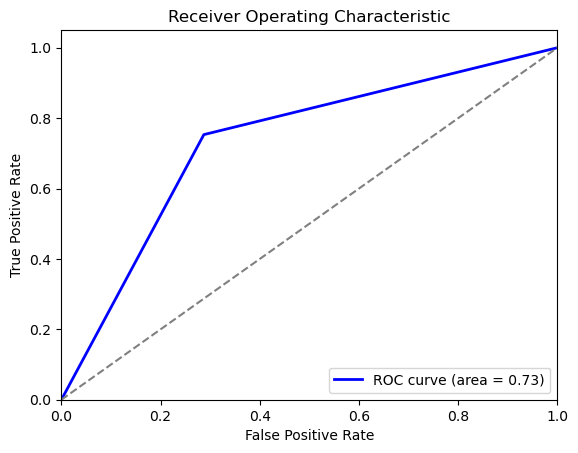

In [19]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()